# NORMALIZAÇÃO

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/NaveProjetoI/Projeto-Aplicado-III/main/dataset/dataset.csv")
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
from sklearn import preprocessing
df_2 = pd.read_csv("https://raw.githubusercontent.com/NaveProjetoI/Projeto-Aplicado-III/main/dataset/dataset.csv")
df_modelo = df_2.select_dtypes(include=['number'])
df_modelo.drop(['Unnamed: 0','popularity','duration_ms','time_signature','tempo'], axis=1, inplace = True)
x_1 = df_modelo.values
min_max_scaler_1 = preprocessing.MinMaxScaler()
x_scaled_1 = min_max_scaler_1.fit_transform(x_1)
nome_colunas_1 = df_modelo.columns
df_modelo = pd.DataFrame(x_scaled_1, columns = nome_colunas_1)
df_modelo['track_genre'] = df_2['track_genre']
df_modelo['track_name'] = df_2['track_name']
df_modelo['artists'] = df_2['artists']
df_modelo = df_modelo.drop_duplicates(subset=['track_name'])

In [5]:
df_modelo.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre', 'track_name', 'artists'],
      dtype='object')

# TESTE 1

## K-Means

In [ ]:
df_modelo['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

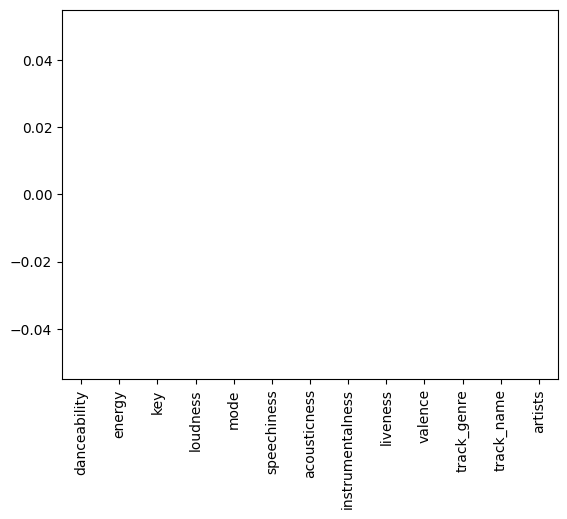

In [10]:
#Verificação dos dados ausentes no df normalizado
df_modelo.dropna(inplace = True)
df_modelo.isnull().sum().plot.bar()
plt.show()

In [14]:
#Importando bibliotecas

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [15]:
#Seleção das colunas para o agrupamento
columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness','acousticness', 'instrumentalness', 'liveness',
                  'valence']
df = df[columns]

#Normalização desses valores
df = (df - df.mean()) / df.std()
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.629236,-0.717144,-1.210429,0.300824,-1.326291,0.551841,-0.850189,-0.504109,0.758732,0.929311
1,-0.845904,-1.889966,-1.210429,-1.784731,0.753976,-0.078995,1.831736,-0.504094,-0.591213,-0.798677
2,-0.742184,-1.122662,-1.491328,-0.293288,0.753976,-0.273825,-0.315488,-0.504112,-0.507170,-1.365673
3,-1.733293,-2.312977,-1.491328,-2.039237,0.753976,-0.457307,1.774597,-0.503884,-0.428379,-1.276960
4,0.295024,-0.788706,-0.929530,-0.282750,0.753976,-0.303145,0.463407,-0.504112,-0.686287,-1.184389
...,...,...,...,...,...,...,...,...,...,...
113995,-2.274946,-1.615645,-0.086833,-1.617314,0.753976,-0.401506,0.977658,2.493731,-0.668428,-1.697771
113996,-2.263422,-2.084773,-1.491328,-2.000067,-1.326291,-0.421367,2.042249,2.648792,-0.570202,-1.693528
113997,0.358409,-1.241932,-1.491328,-0.524133,-1.326291,-0.403397,1.660319,-0.504112,-0.681035,1.037310
113998,0.116394,-0.538239,0.474965,-0.522940,0.753976,-0.519728,0.198763,-0.504112,0.296494,-0.235538


In [16]:
#Armazenar a soma das distâncias quadradas para cada número de clusters numa lista vazia
sse = []

#Ajustar  K-Means em relação ao intervalo dos diferentes nº de clusters
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [17]:
#Print desses valores de SSE
for i, s in enumerate(sse):
    print(f"SSE para {i+1} clusters: {s}")

SSE para 1 clusters: 1139980.0000000147
SSE para 2 clusters: 923404.1703814799
SSE para 3 clusters: 844962.3459503398
SSE para 4 clusters: 767188.8451672636
SSE para 5 clusters: 698370.2525199216
SSE para 6 clusters: 662586.330285714
SSE para 7 clusters: 600895.6396999084
SSE para 8 clusters: 579074.2190648324
SSE para 9 clusters: 534813.3702229235
SSE para 10 clusters: 511439.2203492448
SSE para 11 clusters: 503366.28136439016
SSE para 12 clusters: 488117.51917668805
SSE para 13 clusters: 474012.1561850923
SSE para 14 clusters: 460793.1991549841
SSE para 15 clusters: 452124.853290644
SSE para 16 clusters: 439619.5834733469
SSE para 17 clusters: 418435.4817820013
SSE para 18 clusters: 417543.8865846237
SSE para 19 clusters: 410405.3203321895
SSE para 20 clusters: 403389.8303315107
SSE para 21 clusters: 388995.15189699276
SSE para 22 clusters: 390099.61535176355
SSE para 23 clusters: 378819.60753013566
SSE para 24 clusters: 373009.9263112068
SSE para 25 clusters: 371364.0265703305
SSE p

In [64]:
from sklearn.metrics import r2_score
import numpy as np

#Ponto de cotovelo
def find_elbow_point(sse):
    differences = np.diff(sse)
    second_differences = np.diff(differences)
    elbow_index = np.argmax(second_differences) + 1
    return elbow_index

#Número ideal de clusters com base no ponto de cotovelo
num_clusters = find_elbow_point(sse)

#Calculando o Rmax para o número ideal de clusters encontrado
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans.fit(df)
labels = kmeans.labels_
r2 = r2_score(df, kmeans.cluster_centers_[labels])

print(f"Número ideal de clusters: {num_clusters}")
print(f"Critério Rmax para o número ideal de clusters: {r2}")


Número ideal de clusters: 1
Critério Rmax para o número ideal de clusters: 2.5193988309721055e-13


In [67]:
kmeans = KMeans(n_clusters=10, n_init='auto', random_state=1)
kmeans.fit(df)

KMeans(n_clusters=10, n_init='auto', random_state=1)

In [68]:
#Atribuições de cluster para cada ponto de dados
clusters = kmeans.predict(df)
print(clusters[:30])

[3 5 5 5 5 9 5 9 9 1 5 5 5 5 9 1 5 5 9 5 9 5 5 5 3 3 5 3 5 5]


In [62]:
#Clusterização dos dados
kmeans = KMeans(n_clusters=1)
clusters = kmeans.fit_predict(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']])

df_cluster = df.copy()
df_cluster['cluster'] = clusters

print(df_cluster.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   danceability    energy       key  loudness      mode  speechiness  \
0      0.629236 -0.717144 -1.210429  0.300824 -1.326291     0.551841   
1     -0.845904 -1.889966 -1.210429 -1.784731  0.753976    -0.078995   
2     -0.742184 -1.122662 -1.491328 -0.293288  0.753976    -0.273825   
3     -1.733293 -2.312977 -1.491328 -2.039237  0.753976    -0.457307   
4      0.295024 -0.788706 -0.929530 -0.282750  0.753976    -0.303145   

   acousticness  instrumentalness  liveness   valence  cluster  
0     -0.850189         -0.504109  0.758732  0.929311        0  
1      1.831736         -0.504094 -0.591213 -0.798677        0  
2     -0.315488         -0.504112 -0.507170 -1.365673        0  
3      1.774597         -0.503884 -0.428379 -1.276960        0  
4      0.463407         -0.504112 -0.686287 -1.184389        0  


In [61]:
#Clusterização dos dados
kmeans = KMeans(n_clusters=1)
clusters = kmeans.fit_predict(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']])

df_cluster = df_modelo.copy()
df_cluster['cluster'] = clusters

print(df_cluster.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Length of values (113999) does not match length of index (73608)

In [56]:
print(len(df_modelo))
print(len(clusters))

73608
113999


### **Conclusão**:
*   Inconsistência no número de clusters e pontos de dados.
*   Número de clusters maior que o número de pontos de dados.


Há uma diferença entre o número de clusters atribuídos aos dados e o número de pontos deles no conjunto, pois a clusterização produziu um número maior de clusters do que o número de dados existentes, sendo 73608 dados no df, porém foram agrupados 113999.

Isso pode ter ocorrido porque o número de clusters selecionado excedeu o número ideal determinado pela análise dos dados ou, ainda, pela sobreposição dos dados, já que ao agrupar e calcular o número de cluster seria 1, por serem dados semelhantes. Sendo assim, é necessário ajustar o número de clusters para corresponder à estrutura real dos dados. Escolher um número menor de clusters pode implicar em adequar outras técnicas de clusterização mais apropriadas para o conjunto de informações. Qual é o procedimento?

# TESTE 2

## DBSCAN

In [69]:
df_modelo.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre', 'track_name', 'artists'],
      dtype='object')

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

features = df
scaler = MinMaxScaler()

#Normalização
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_features = scaled_features[:250000]
scaled_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.0
1,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.5
2,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.5
3,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.5
4,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,1.0
...,...,...,...,...,...,...,...,...,...,...,...
113994,0.174619,0.2350,0.454545,0.612952,1.0,0.043731,0.642570,0.928000,0.0863,0.034070,0.5
113995,0.176650,0.1170,0.000000,0.577345,0.0,0.041554,0.997992,0.976000,0.1050,0.035176,0.5
113996,0.638579,0.3290,0.000000,0.714648,0.0,0.043523,0.870482,0.000000,0.0839,0.746734,0.5
113997,0.595939,0.5060,0.636364,0.714759,1.0,0.030777,0.382530,0.000000,0.2700,0.415075,1.0


In [85]:
from sklearn.cluster import DBSCAN

#Definindo os parâmetros
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

#Algoritmo dos dados normalizados
clusters = dbscan.fit_predict(scaled_features)

#Resultados do agrupamento
print(clusters)

[0 1 1 ... 3 2 0]


In [86]:
import numpy as np

#Excluindo os rótulos de ruído (-1) da contagem
num_clusters = len(np.unique(clusters[clusters != -1]))

print("Número total de clusters identificados:", num_clusters)

Número total de clusters identificados: 4


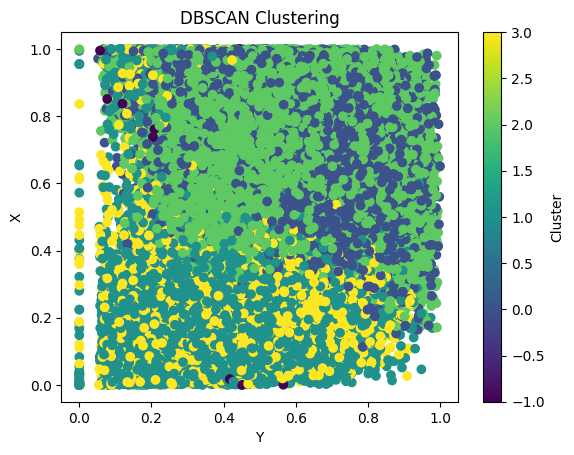

In [84]:
import matplotlib.pyplot as plt

#Scatter plot dos pontos de dados
plt.scatter(scaled_features.iloc[:, 0], scaled_features.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Y')
plt.ylabel('X')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [89]:
df_modelo.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre', 'track_name', 'artists'],
      dtype='object')

In [95]:
from sklearn.cluster import DBSCAN

def music_recommend_cluster_based(data, features, given_song_features, eps=0.5, min_samples=5, N=10):
    #Aplicação do algoritmo DBSCAN para agrupar as músicas
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)

    #Identificar o cluster da música dada pelo usuário
    given_song_cluster = clusters[data[data['track_name'] == given_song_features['track_name']].index[0]]

    #Selecionar músicas pertencentes ao mesmo cluster da música fornecida pelo usuário no comando acima
    similar_songs_indices = [i for i, cluster in enumerate(clusters) if cluster == given_song_cluster]
    similar_songs = data.iloc[similar_songs_indices]

    #Excluindo a música fornecida pelo usuário da lista de recomendações
    similar_songs = similar_songs[similar_songs['track_name'] != given_song_features['track_name']]

    #Fazer recomendação top N músicas do mesmo cluster
    recommended_songs = similar_songs['track_name'].tolist()[:N]

    return recommended_songs

#Input do usuário
user_song_name = input("Digite o nome da música: ")

#Características da música fornecida pelo usuário
given_song_features = df_modelo[df_modelo['track_name'] == user_song_name].iloc[0]

#Definindo as features usadas no DBSCAN
features = df_modelo[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence']]

#Recomendação das músicas com base nos clusters usando DBSCAN
recommended_songs = music_recommend_cluster_based(df_modelo, features, given_song_features, eps=0.5, min_samples=5, N=10)
print(recommended_songs)

Digite o nome da música: Malvadão
['Ghost - Acoustic', 'To Begin Again', "Can't Help Falling In Love", 'Hold On', 'Days I Will Remember', 'Say Something', "I'm Yours", 'Lucky', 'Hunger', 'Give Me Your Forever']


### **Conclusão:**

*   Problema: Falta de variedade nos clusters produzidos pelo DBSCAN, pois são muito semelhantes.
*   Indicativo: Recomendações consistentes, independentemente da música fornecida como entrada.
*  Causas possíveis: Parâmetros inadequados ou irrelevantes.


# TESTE 3

## COUNTVECTORIZER (CV)

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [97]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,0.629236,-0.717144,-1.210429,0.300824,-1.326291,0.551841,-0.850189,-0.504109,0.758732,0.929311,0
1,-0.845904,-1.889966,-1.210429,-1.784731,0.753976,-0.078995,1.831736,-0.504094,-0.591213,-0.798677,1
2,-0.742184,-1.122662,-1.491328,-0.293288,0.753976,-0.273825,-0.315488,-0.504112,-0.507170,-1.365673,1
3,-1.733293,-2.312977,-1.491328,-2.039237,0.753976,-0.457307,1.774597,-0.503884,-0.428379,-1.276960,1
4,0.295024,-0.788706,-0.929530,-0.282750,0.753976,-0.303145,0.463407,-0.504112,-0.686287,-1.184389,2


In [99]:
df.drop(['cluster'], axis=1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.629236,-0.717144,-1.210429,0.300824,-1.326291,0.551841,-0.850189,-0.504109,0.758732,0.929311
1,-0.845904,-1.889966,-1.210429,-1.784731,0.753976,-0.078995,1.831736,-0.504094,-0.591213,-0.798677
2,-0.742184,-1.122662,-1.491328,-0.293288,0.753976,-0.273825,-0.315488,-0.504112,-0.507170,-1.365673
3,-1.733293,-2.312977,-1.491328,-2.039237,0.753976,-0.457307,1.774597,-0.503884,-0.428379,-1.276960
4,0.295024,-0.788706,-0.929530,-0.282750,0.753976,-0.303145,0.463407,-0.504112,-0.686287,-1.184389
...,...,...,...,...,...,...,...,...,...,...
113995,-2.274946,-1.615645,-0.086833,-1.617314,0.753976,-0.401506,0.977658,2.493731,-0.668428,-1.697771
113996,-2.263422,-2.084773,-1.491328,-2.000067,-1.326291,-0.421367,2.042249,2.648792,-0.570202,-1.693528
113997,0.358409,-1.241932,-1.491328,-0.524133,-1.326291,-0.403397,1.660319,-0.504112,-0.681035,1.037310
113998,0.116394,-0.538239,0.474965,-0.522940,0.753976,-0.519728,0.198763,-0.504112,0.296494,-0.235538


In [103]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
cluster             0
dtype: int64

In [109]:
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence'],
      dtype='object')

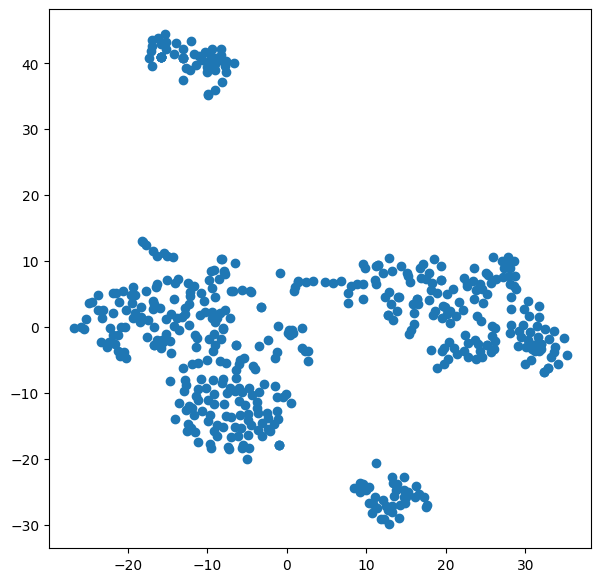

In [102]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(df.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

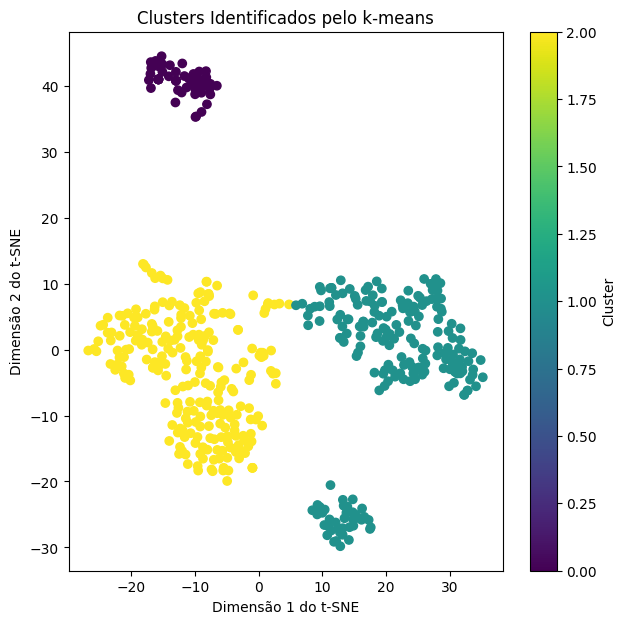

In [127]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#Dados do t-SNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df.head(500))

#Aplicando K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tsne_data)

#Visualização dos clusters
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Identificados pelo k-means')
plt.xlabel('Dimensão 1 do t-SNE')
plt.ylabel('Dimensão 2 do t-SNE')
plt.colorbar(label='Cluster')
plt.show()

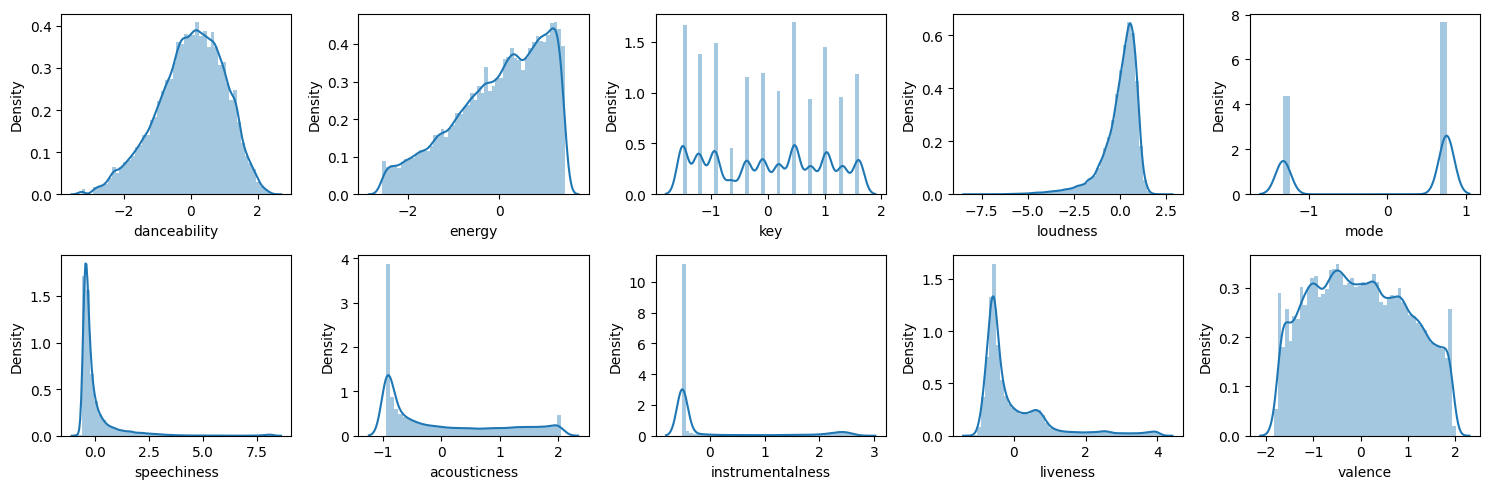

In [110]:
#Distribuição das características musicais segundo as features definidas
plt.subplots(figsize = (15, 5))
for i, col in enumerate(features):
  plt.subplot(2, 5, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [116]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'cluster'],
      dtype='object')

In [113]:
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df_modelo['track_genre'])

CountVectorizer()

In [118]:
#Gêneros existentes
all_genres = df_modelo['track_genre'].unique()

#Transformando todos esses gêneros
transformed_all_genres = song_vectorizer.transform(all_genres)
print(transformed_all_genres)

  (0, 0)	1
  (1, 1)	1
  (2, 3)	1
  (2, 88)	1
  (3, 4)	1
  (4, 5)	1
  (5, 7)	1
  (6, 9)	1
  (6, 71)	1
  (7, 10)	1
  (8, 11)	1
  (9, 12)	1
  (10, 13)	1
  (11, 14)	1
  (12, 15)	1
  (13, 16)	1
  (13, 58)	1
  (14, 17)	1
  (15, 18)	1
  (16, 19)	1
  (17, 20)	1
  (18, 21)	1
  (19, 22)	1
  (20, 23)	1
  (21, 24)	1
  :	:
  (93, 91)	1
  (94, 92)	1
  (95, 93)	1
  (96, 94)	1
  (97, 95)	1
  (98, 96)	1
  (98, 111)	1
  (99, 97)	1
  (99, 100)	1
  (100, 98)	1
  (101, 99)	1
  (102, 101)	1
  (103, 102)	1
  (104, 103)	1
  (105, 104)	1
  (106, 81)	1
  (106, 105)	1
  (107, 106)	1
  (108, 107)	1
  (109, 109)	1
  (110, 57)	1
  (110, 110)	1
  (111, 112)	1
  (112, 75)	1
  (112, 113)	1


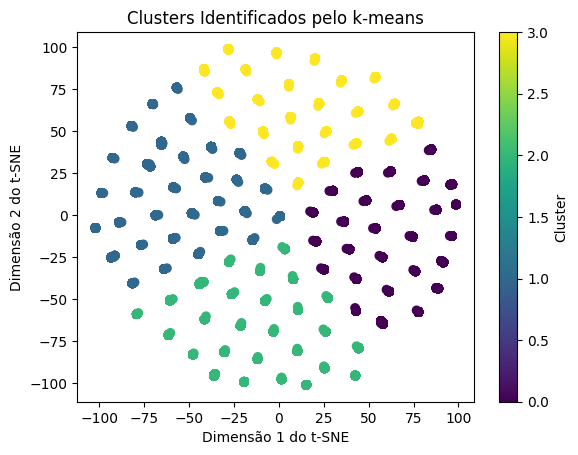

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#Definindo variável dos gêneros
genres = df_modelo['track_genre']

#CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(genres)

#t-SNE com inicialização aleatória
tsne = TSNE(n_components=2, random_state=0, init='random')
X_tsne = tsne.fit_transform(X.toarray())  # Convertendo para uma matriz densa

#Algoritmo de agrupamento do K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_tsne)

#Visualizando os clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Identificados pelo k-means')
plt.xlabel('Dimensão 1 do t-SNE')
plt.ylabel('Dimensão 2 do t-SNE')
plt.colorbar(label='Cluster')
plt.show()

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

#t-SNE
tsne = TSNE(n_components=2, random_state=0, init='random')
X_tsne = tsne.fit_transform(X.toarray())  # Convertendo para uma matriz densa

#Criando função para recomendar músicas dentro do mesmo cluster
def recomendar_musica_por_cluster(nome_musica, df, vectorizer, kmeans):
    # Verificar se o nome da música está presente no DataFrame
    if nome_musica not in df['track_name'].values:
        return "Nome da música não encontrado no dataset."

    #Músicas
    indice_musica = df[df['track_name'] == nome_musica].index[0]

    #Vetor das características da música
    musica_vetorizada = vectorizer.transform([df.iloc[indice_musica]['track_genre']])

    #Prever o cluster da música fornecida
    cluster_musica = kmeans.predict(musica_vetorizada)

    #Filtrar as músicas no mesmo cluster
    indices_similares = (clusters == cluster_musica[0])
    recomendacoes = df[indices_similares]

    return recomendacoes

#Exemplo de uso da função de recomendação por nome da música
nome_musica = "Malvadão"
recomendacoes = recomendar_musica_por_cluster(nome_musica, df_modelo, vectorizer, kmeans)
print(recomendacoes)

        danceability  energy       key  loudness  mode  speechiness  \
0           0.686294  0.4610  0.090909  0.791392   0.0     0.148187   
1           0.426396  0.1660  0.090909  0.597377   1.0     0.079067   
2           0.444670  0.3590  0.000000  0.736123   1.0     0.057720   
3           0.270051  0.0596  0.000000  0.573701   1.0     0.037617   
4           0.627411  0.4430  0.181818  0.737103   1.0     0.054508   
...              ...     ...       ...       ...   ...          ...   
113994      0.336041  0.1710  0.090909  0.626362   1.0     0.036269   
113995      0.174619  0.2350  0.454545  0.612952   1.0     0.043731   
113996      0.176650  0.1170  0.000000  0.577345   0.0     0.041554   
113997      0.638579  0.3290  0.000000  0.714648   0.0     0.043523   
113999      0.534010  0.4870  0.090909  0.727429   0.0     0.075130   

        acousticness  instrumentalness  liveness   valence  track_genre  \
0           0.032329          0.000001    0.3580  0.718593     acoustic 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2beda4e3-0bfe-492a-88c4-753e8babe4d4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>